In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ts = pd.read_csv("../results/metrics/TabuSearch_results.csv")
ga = pd.read_csv("../results/metrics/GeneticAlgorithm_results.csv")

ts, ga

(   Cities  MeanLength  StdLength  MeanTime  StdTime
 0      10     283.840      0.000    9.4224   0.3999
 1      20     383.880      0.000   14.3778   0.9414
 2      30     435.268      0.000   21.2834   2.5858
 3      40     513.176      0.265   27.4757   9.6293
 4      50     565.227      5.023   28.1254   0.2527,
    Cities  MeanLength  StdLength  MeanTime  StdTime
 0      10     283.840      0.000    0.4635   0.0061
 1      20     389.672     10.507    0.6590   0.0172
 2      30     452.801     16.383    0.9062   0.1073
 3      40     540.523     14.645    1.1892   0.0359
 4      50     627.418     21.291    1.5457   0.0983)

This study evaluated the performance of two metaheuristic optimisation algorithms—Tabu Search (TS) and a Genetic Algorithm (GA)—on the Travelling Salesman Problem using city instances of size 10, 20, 30, 40, and 50. Each experimental configuration was executed 30 independent times to ensure statistical reliability. Performance was assessed using mean tour length, standard deviation of tour length, and mean runtime, as illustrated in Figures 1–3.

# Plot 1 — Mean Tour Length vs Number of Cities

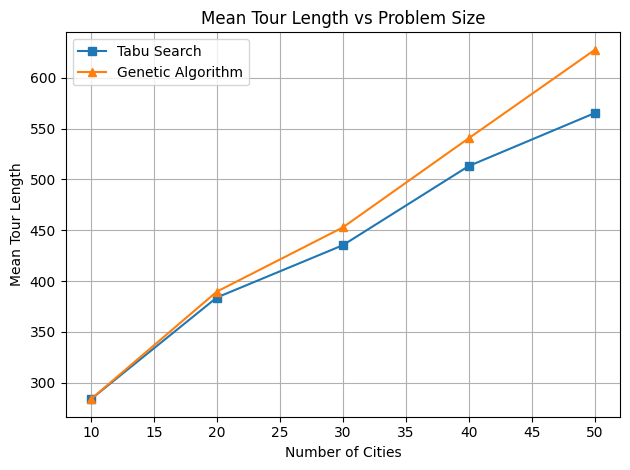

In [4]:
plt.figure()
plt.plot(ts["Cities"], ts["MeanLength"], marker="s", label="Tabu Search")
plt.plot(ga["Cities"], ga["MeanLength"], marker="^", label="Genetic Algorithm")

plt.xlabel("Number of Cities")
plt.ylabel("Mean Tour Length")
plt.title("Mean Tour Length vs Problem Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Figure 1: Mean Tour Length vs Problem Size

As shown in Figure 1, Tabu Search consistently achieved lower mean tour lengths than the Genetic Algorithm across all problem sizes, demonstrating superior solution quality. For small instances (10 cities), both algorithms produced near-identical results, indicating that the search space is sufficiently small for both methods to locate near-optimal solutions.

However, as the number of cities increased, the performance gap widened. At 50 cities, Tabu Search achieved a mean tour length of approximately 565, whereas the Genetic Algorithm produced a substantially higher mean tour length of approximately 627. This clearly indicates that Tabu Search scales more effectively in terms of solution quality for medium-sized TSP instances.

The superior performance of Tabu Search is attributed to its memory-guided local search mechanism, which systematically discourages cycling and enables effective escape from local optima. In contrast, although the Genetic Algorithm provides strong global exploration through population-based evolution, its exploitation capability under the selected parameter configuration was weaker, resulting in slower convergence toward high-quality solutions.

# Plot 2 — Runtime Scaling

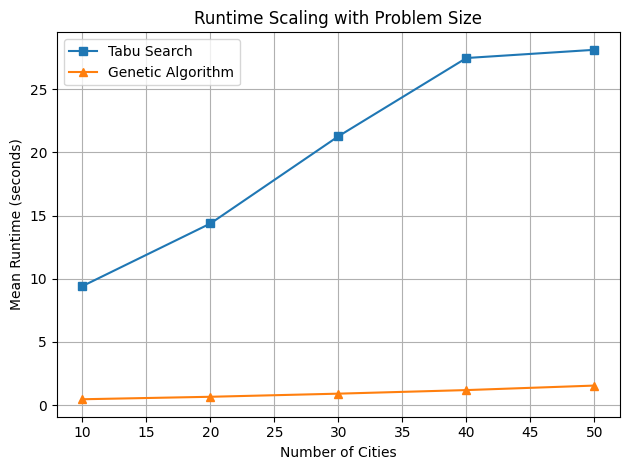

In [5]:
plt.figure()
plt.plot(ts["Cities"], ts["MeanTime"], marker="s", label="Tabu Search")
plt.plot(ga["Cities"], ga["MeanTime"], marker="^", label="Genetic Algorithm")

plt.xlabel("Number of Cities")
plt.ylabel("Mean Runtime (seconds)")
plt.title("Runtime Scaling with Problem Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Figure 2: Runtime Scaling with Problem Size

Figure 2 illustrates the runtime scaling behaviour of both algorithms as the problem size increases. The Genetic Algorithm consistently required significantly less computational time than Tabu Search across all instance sizes. For example, at 50 cities, the Genetic Algorithm achieved a mean runtime of approximately 1.5 seconds, whereas Tabu Search required approximately 28 seconds.

This substantial runtime difference is explained by the algorithms’ inherent computational structures. The Genetic Algorithm evaluates a fixed-size population across a predefined number of generations, resulting in predictable and moderate computational cost. In contrast, Tabu Search performs intensive neighbourhood exploration at each iteration, combined with tabu list management and aspiration checking, leading to substantially higher runtime overhead.

These results highlight a clear trade-off between computational cost and solution quality, where Tabu Search prioritises solution refinement at the expense of speed, while the Genetic Algorithm maintains relatively low execution time but with weaker solution quality.

# Plot 3 — Stability (Std Deviation of Tour Length)

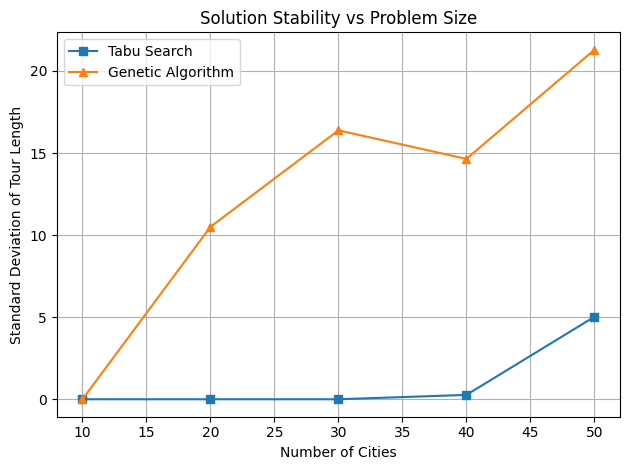

In [6]:
plt.figure()
plt.plot(ts["Cities"], ts["StdLength"], marker="s", label="Tabu Search")
plt.plot(ga["Cities"], ga["StdLength"], marker="^", label="Genetic Algorithm")

plt.xlabel("Number of Cities")
plt.ylabel("Standard Deviation of Tour Length")
plt.title("Solution Stability vs Problem Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Figure 3: Solution Stability vs Problem Size

Solution stability was measured using the standard deviation of tour length across 30 runs (Figure 3). Tabu Search exhibited near-zero variance for smaller instances and maintained very low variance for larger instances, with a standard deviation of approximately 5 at 50 cities. This demonstrates excellent robustness and repeatability, confirming that Tabu Search consistently converges to high-quality solutions regardless of the initial starting conditions.

In contrast, the Genetic Algorithm displayed substantially higher variance at all problem sizes, with the standard deviation increasing to over 21 at 50 cities. This higher variance reflects the stochastic nature of population-based optimisation, where random crossover and mutation introduce intrinsic variability in solution quality across different runs. While such randomness supports global exploration, it also reduces consistency in final solution quality.

Overall Comparative Discussion

Overall, the experimental results demonstrate that Tabu Search is the superior algorithm in terms of solution quality and robustness, while the Genetic Algorithm is substantially more efficient in terms of runtime. Tabu Search consistently produced shorter tours with minimal variance, making it highly suitable for applications where solution accuracy and reliability are critical, such as logistics planning, route optimisation, and decision-support systems.

Conversely, the Genetic Algorithm offers a computationally efficient alternative with strong global exploration capability but underperforms relative to Tabu Search in terms of final solution quality under the chosen parameter settings. Its higher variance and weaker exploitation indicate a need for further parameter tuning or hybridisation with local search methods to enhance convergence reliability.

These findings demonstrate that algorithm selection must be guided by operational context. For offline problems where runtime is less constrained and accuracy is paramount, Tabu Search is the recommended deployment choice. In contrast, for scenarios where rapid approximate solutions are required, the Genetic Algorithm provides a practical compromise between speed and solution quality.
